In [ ]:
from google.colab import files
import pandas as pd

files.upload()

data = pd.read_csv("/content/credit_card_data.csv")
data.head()

Saving credit_card_data.csv to credit_card_data.csv


,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
0,L011,2016,1,812,2,서울,NaN,10대,55000,1.44,...,0,0,0,1120000,8210000,78020000,92170000,87260000,0,0
1,L011,2016,2,773,4,서울,NaN,10대,380000,1.71,...,510000,220000,1020000,680000,4660000,23300000,8260000,42410000,4000,1000
2,L011,2016,3,771,4,서울,NaN,10대,387000,1.75,...,490000,210000,1140000,640000,4370000,22930000,8300000,41710000,3000,1000
3,L011,2016,4,770,4,서울,NaN,10대,412000,1.76,...,510000,240000,1340000,510000,4770000,22160000,9460000,41040000,4000,1000
4,L011,2016,5,771,4,서울,NaN,10대,414000,1.75,...,490000,340000,1490000,640000,4740000,21960000,9660000,40850000,3000,1000


In [ ]:
#라이브러리 불러오기

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette("hls")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pop_cd                            3888 non-null   object 
 1   year                              3888 non-null   int64  
 2   month                             3888 non-null   int64  
 3   avg_score                         3888 non-null   int64  
 4   avg_rat                           3888 non-null   int64  
 5   city                              3456 non-null   object 
 6   sex                               432 non-null    object 
 7   ages                              3888 non-null   object 
 8   population                        3888 non-null   int64  
 9   num_opencard                      3888 non-null   float64
 10  num_usecard                       3888 non-null   float64
 11  monthly_card_spend                3888 non-null   int64  
 12  monthl

In [ ]:
#일부 특성을 가지고 클러스터링 진행
# avg_score : 신용점수
# city : 사는 곳
# ages : 연령대
# monthly_card_spend : 카드 결제금액
# monthly_loan : 총 대출 금액
# inst_rep_loanb: 대출 상환금액

df = data[['avg_score','ages','city','monthly_card_spend','num_opencard','monthly_loan','inst_rep_loanb']]
df

,avg_score,ages,city,monthly_card_spend,num_opencard,monthly_loan,inst_rep_loanb
0,812,10대,서울,70000,1.44,87350000,8210000
1,773,10대,서울,170000,1.71,28910000,4660000
2,771,10대,서울,190000,1.75,28180000,4370000
3,770,10대,서울,200000,1.76,27710000,4770000
4,771,10대,서울,170000,1.75,27620000,4740000
...,...,...,...,...,...,...,...
3883,819,90대,NaN,90000,0.11,86580000,21340000
3884,819,90대,NaN,90000,0.11,86780000,21710000
3885,819,90대,NaN,90000,0.11,86110000,21720000
3886,819,90대,NaN,90000,0.11,85920000,21700000


In [ ]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_score           3888 non-null   int64  
 1   ages                3888 non-null   object 
 2   city                3456 non-null   object 
 3   monthly_card_spend  3888 non-null   int64  
 4   num_opencard        3888 non-null   float64
 5   monthly_loan        3888 non-null   int64  
 6   inst_rep_loanb      3888 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 212.8+ KB


In [ ]:
df['city'].value_counts()

서울    216
인천    216
대전    216
대구    216
광주    216
부산    216
울산    216
경기    216
강원    216
충북    216
충남    216
전북    216
전남    216
경북    216
경남    216
제주    216
Name: city, dtype: int64

In [ ]:
df['city'].unique()

array(['서울', '인천', '대전', '대구', '광주', '부산', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', nan], dtype=object)

In [ ]:
df.dropna()

,avg_score,ages,city,monthly_card_spend,num_opencard,monthly_loan,inst_rep_loanb
0,812,10대,서울,70000,1.44,87350000,8210000
1,773,10대,서울,170000,1.71,28910000,4660000
2,771,10대,서울,190000,1.75,28180000,4370000
3,770,10대,서울,200000,1.76,27710000,4770000
4,771,10대,서울,170000,1.75,27620000,4740000
...,...,...,...,...,...,...,...
3835,810,90대,제주,50000,0.38,28950000,6990000
3836,809,90대,제주,30000,0.41,29440000,7640000
3837,809,90대,제주,50000,0.42,26850000,7910000
3838,810,90대,제주,40000,0.43,41250000,7420000


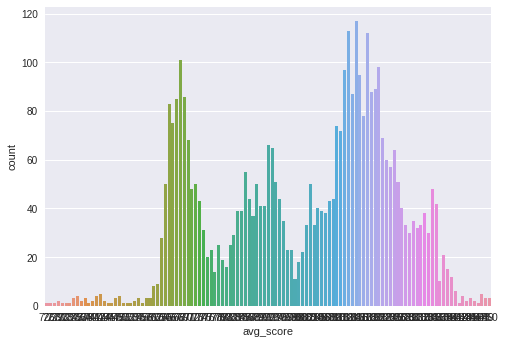

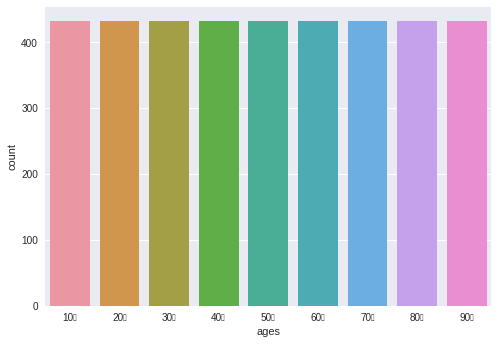

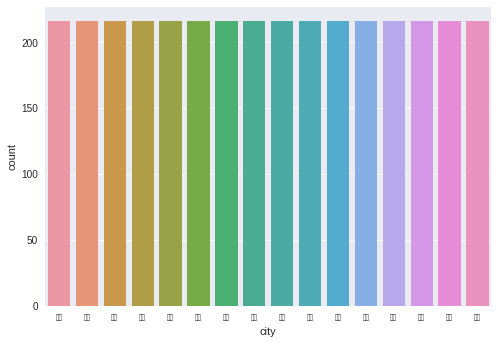

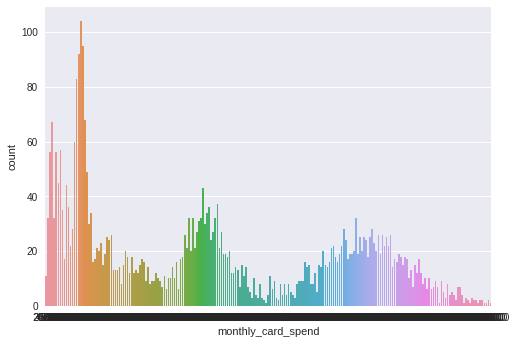

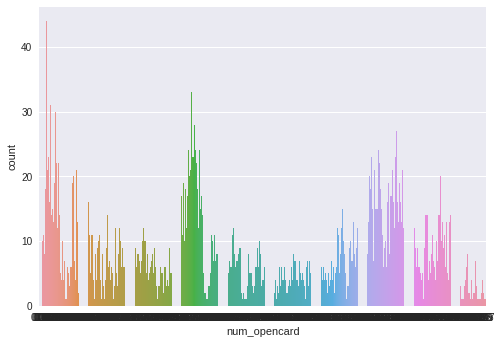

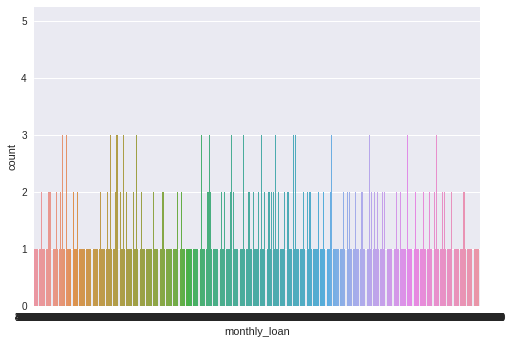

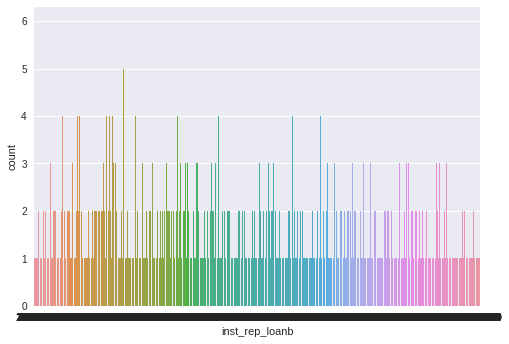

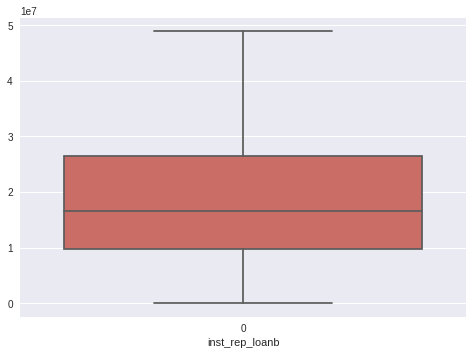

In [ ]:
#대충 column 잘 골랐는지 확인해주기 
for col in df.columns : 
  sns.countplot(x=col , data = df)
  plt.xlabel(col)
  plt.show()

else : 
  sns.boxplot(data = df[col])
  plt.xlabel(col)
  plt.show()

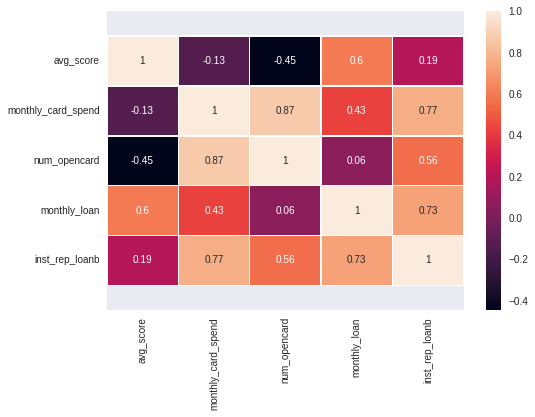

In [ ]:
#변수 간 선형관계 확인해주기
g = sns.heatmap(df.corr(), annot=True, linewidths= .5)
bottom, top = g.get_ylim()
g.set_ylim(bottom+0.5, top-0.5)
plt.show()

#아... 카드 결제금이랑 대출상환금액, 신용점수랑 초 대출금액, 대출상환금액과 총 대출금액 상관관계가 너무 높은디

클러스터링 시작


In [ ]:
#거리 계산을 위해 문자형 데이터 encoding
print(df['city'].unique())
print(df['ages'].unique())


['서울' '인천' '대전' '대구' '광주' '부산' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주' nan]
['10대' '20대' '30대' '40대' '50대' '60대' '70대' '80대' '90대']


In [ ]:
#연령대는 그냥 레이블 인코딩
df['ages'].replace({'10대':1, '20대':2, '30대':3, '40대':4, '50대':5, '60대':6, '70대': 7, '80대':8, '90대':9}, inplace = True)

In [ ]:
#하지만 지역은 원핫 인코딩 진행

df_cluster = pd.get_dummies(df, columns = ['city'])

df_cluster

,avg_score,ages,monthly_card_spend,num_opencard,monthly_loan,inst_rep_loanb,city_강원,city_경기,city_경남,city_경북,...,city_대전,city_부산,city_서울,city_울산,city_인천,city_전남,city_전북,city_제주,city_충남,city_충북
0,812,1,70000,1.44,87350000,8210000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,773,1,170000,1.71,28910000,4660000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,771,1,190000,1.75,28180000,4370000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,770,1,200000,1.76,27710000,4770000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,771,1,170000,1.75,27620000,4740000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,819,9,90000,0.11,86580000,21340000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3884,819,9,90000,0.11,86780000,21710000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3885,819,9,90000,0.11,86110000,21720000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3886,819,9,90000,0.11,85920000,21700000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_score           3888 non-null   int64  
 1   ages                3888 non-null   int64  
 2   monthly_card_spend  3888 non-null   int64  
 3   num_opencard        3888 non-null   float64
 4   monthly_loan        3888 non-null   int64  
 5   inst_rep_loanb      3888 non-null   int64  
 6   city_강원             3888 non-null   uint8  
 7   city_경기             3888 non-null   uint8  
 8   city_경남             3888 non-null   uint8  
 9   city_경북             3888 non-null   uint8  
 10  city_광주             3888 non-null   uint8  
 11  city_대구             3888 non-null   uint8  
 12  city_대전             3888 non-null   uint8  
 13  city_부산             3888 non-null   uint8  
 14  city_서울             3888 non-null   uint8  
 15  city_울산             3888 non-null   uint8  
 16  city_인

In [ ]:
#단위 맞춰주기 위해 정규화 진행 
df_cluster['avg_score'] = (df_cluster['avg_score']-df_cluster['avg_score'].min())/(df_cluster['avg_score'].max()-df_cluster['avg_score'].min())
df_cluster['ages'] = (df_cluster['ages']-df_cluster['ages'].min())/(df_cluster['ages'].max()-df_cluster['ages'].min())
df_cluster['monthly_card_spend'] = (df_cluster['monthly_card_spend']-df_cluster['monthly_card_spend'].min())/(df_cluster['monthly_card_spend'].max()-df_cluster['monthly_card_spend'].min())
df_cluster['monthly_loan'] = (df_cluster['monthly_loan']-df_cluster['monthly_loan'].min())/(df_cluster['monthly_loan'].max()-df_cluster['monthly_loan'].min())
df_cluster['inst_rep_loanb'] = (df_cluster['inst_rep_loanb']-df_cluster['inst_rep_loanb'].min())/(df_cluster['inst_rep_loanb'].max()-df_cluster['inst_rep_loanb'].min())
df_cluster['num_opencard'] = (df_cluster['num_opencard']-df_cluster['num_opencard'].min())/(df_cluster['num_opencard'].max()-df_cluster['num_opencard'].min())

In [ ]:
df_cluster.dropna(inplace=True)
df_cluster

,avg_score,ages,monthly_card_spend,num_opencard,monthly_loan,inst_rep_loanb,city_강원,city_경기,city_경남,city_경북,...,city_대전,city_부산,city_서울,city_울산,city_인천,city_전남,city_전북,city_제주,city_충남,city_충북
0,0.693548,0.0,0.021930,0.265748,0.516477,0.167859,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.379032,0.0,0.065789,0.318898,0.156514,0.095277,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.362903,0.0,0.074561,0.326772,0.152017,0.089348,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.354839,0.0,0.078947,0.328740,0.149122,0.097526,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.362903,0.0,0.065789,0.326772,0.148568,0.096913,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,0.750000,1.0,0.030702,0.003937,0.511734,0.436312,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3884,0.750000,1.0,0.030702,0.003937,0.512966,0.443877,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3885,0.750000,1.0,0.030702,0.003937,0.508839,0.444081,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3886,0.750000,1.0,0.030702,0.003937,0.507669,0.443672,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
errors=[]
K = range(1,10) 
for i in range(1,10) :
  kmeans = KMeans(n_clusters = i , random_state=0).fit(df_cluster)
  errors.append(kmeans.inertia_)

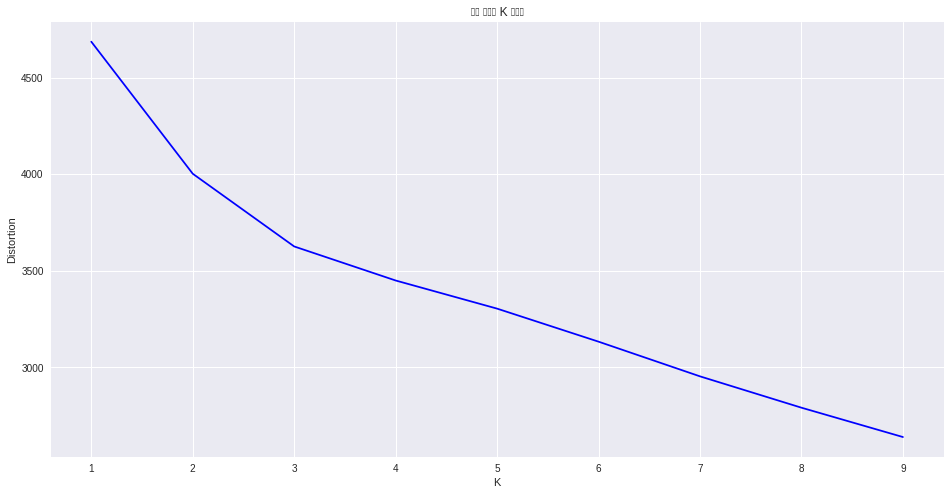

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, errors, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title("가장 적절한 K 구하기")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(df_cluster)
kmeans.cluster_centers_
label = kmeans.labels_
df_cluster['idx'] = label

In [ ]:
df_cluster.head()

,avg_score,ages,monthly_card_spend,num_opencard,monthly_loan,inst_rep_loanb,city_강원,city_경기,city_경남,city_경북,...,city_부산,city_서울,city_울산,city_인천,city_전남,city_전북,city_제주,city_충남,city_충북,idx
0,0.693548,0.0,0.021930,0.265748,0.516477,0.167859,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.379032,0.0,0.065789,0.318898,0.156514,0.095277,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.362903,0.0,0.074561,0.326772,0.152017,0.089348,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.354839,0.0,0.078947,0.328740,0.149122,0.097526,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.362903,0.0,0.065789,0.326772,0.148568,0.096913,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


idx
0     216
1    1315
2    1541
3     816
Name: avg_score, dtype: int64


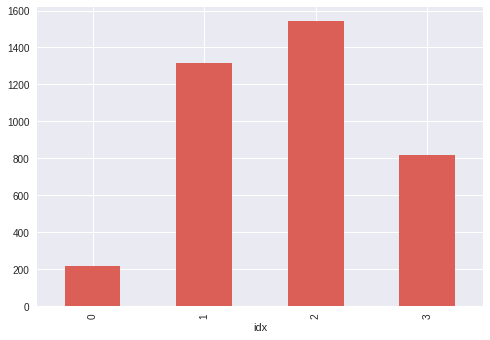

In [ ]:
#클러스터 크기 확인
from pandas import Series, DataFrame

df_n = DataFrame(df_cluster)
cluster_size = df_n['idx'].value_counts()
cluster_size = df_cluster.groupby(["idx"])['avg_score'].count()
print(cluster_size)
cluster_size.plot(kind="bar")

클러스터 특성 차이 보기

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


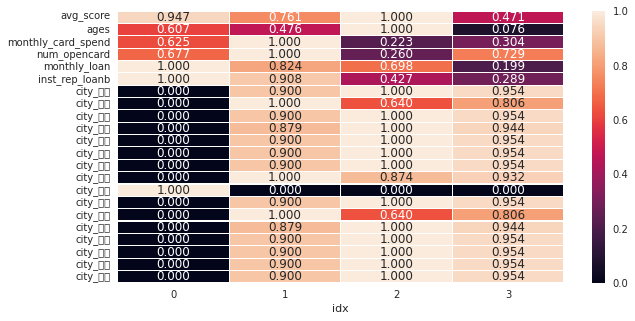

In [ ]:
temp = df_n.groupby(['idx']).mean()
cluster_mean = temp.transpose()
mean_table = cluster_mean.div(cluster_mean.max(axis=1), axis= 0)

plt.rc('font', family = "NanumGothic")
plt.figure(figsize=(10,5))
annot_kws = {'fontsize':12}
sns.heatmap(mean_table, annot=True, fmt ='.3f', linewidths = 0.1, annot_kws = annot_kws)

plt.show()

In [ ]:
temp

,avg_score,ages,monthly_card_spend,num_opencard,monthly_loan,inst_rep_loanb,city_강원,city_경기,city_경남,city_경북,...,city_대전,city_부산,city_서울,city_울산,city_인천,city_전남,city_전북,city_제주,city_충남,city_충북
idx,,,,,,,,,,,,,,,,,,,,,
0,0.714046,0.500000,0.419367,0.473398,0.532826,0.653000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.573777,0.392300,0.670809,0.698988,0.438843,0.592999,0.055513,0.073004,0.055513,0.054753,...,0.055513,0.063118,0.0,0.055513,0.073004,0.054753,0.055513,0.055513,0.055513,0.055513
2,0.754297,0.823572,0.149612,0.181410,0.371704,0.278811,0.061648,0.046723,0.061648,0.062297,...,0.061648,0.055159,0.0,0.061648,0.046723,0.062297,0.061648,0.061648,0.061648,0.061648
3,0.355165,0.062500,0.204055,0.509261,0.106191,0.188562,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.0,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824


In [ ]:
temp.to_csv("temp2.csv")